# Week 5: Graded Series

**Course**: [_Modélisation mathématique et computationnelle en biologie_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Felix Naef_

SSV, BA5, 2022 (Graded exercise series)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint

# Linear phase portraits

Consider the following linear system:


$$
\begin{array}{c}
\dot{x} = 2x + 2y\\
\dot{y} = 8x - 4y
\end{array}
$$



**1. Find the fixed point(s) and specify its/their stability.**

> #### Answer
> The system has one fixed point in (0,0) that is a saddle point. (tr(J) = -2, det(J) = -24)

**2. Find the eigenvalues and eigenvectors of the matrix associated with this system.**

> #### Answer

> Eigenvalues

> $$ 
	\lambda_1 = -6
    \\
    \lambda_2 = 4
$$

> Eigenvectors
> 	$$
	\nu_1 = 
		\left(
		\begin{matrix}
        -1
		\\
		4
		\end{matrix}
		\right),
	\nu_2 = 
		\left(
		\begin{matrix}
        1
		\\
		1
		\end{matrix}
		\right),
	$$




**3. Use 2. to write the general solution of the system**

> **Answer**

>$$
\boldsymbol{X}\left(t\right)= (x(t), y(t)) = c_{1}
		\left(
		\begin{matrix}
        -1
		\\
		4
		\end{matrix}
		\right) e^{-6t} + 
        c_{2}
		\left(
		\begin{matrix}
        1
		\\
		1
		\end{matrix}
		\right)  e^{4t}
$$

**4. Plot the phase portrait in the $(x,y)$-plane.**    


Plot using python:

- the fixed point(s)

- the isoclines 

- the eigenvectors

- the vector field 

> Hint: To plot the vector field you can use:

> - np.meshgrid to define the positions at which you want to represent the arrows. 

> - Use plt.quiver to plot the arrow field

> - You can also look at previous corrections to understand how to plot a phase portrait using Python.

- Representative trajectories for different initial conditions listed in the array defined below ($X_0s$).

> Hint: To plot trajectories, use the explicit solution that you have found in 3. 


Plot for values of x and y in the interval [-5,5]. For the trajectories, use the tspan vector defined below.

  

In [3]:
# Time domain
tspan = np.linspace(0, 10, 1000)

# Initial conditions
X0s = [(-2.5,5), (2.5,-5), (1,-5), (0,5)]  
    

> **Answer**

> To find the trajectories, you can express $c_1$ and $c_2$ in function of the initial coordinates $x_0$ and $y_0$ by solving this equation:



> $$
\boldsymbol{X}\left(0\right)= (x_0, y_0) = c_{1}
		\left(
		\begin{matrix}
        -1
		\\
		4
		\end{matrix}
		\right) + 
        c_{2}
		\left(
		\begin{matrix}
        1
		\\
		1
		\end{matrix}
		\right)  
$$

> leading to this expression for $c_1$ and $c_2$:

> $$
(c_1, c_2) = 
		\left(
		\begin{matrix}
        \frac{y_0 - x_0}{5}
		\\
		\frac{4 x_0 + y_0}{5}
		\end{matrix}
		\right)  
$$


In [4]:
def model(s):
    x,y=s
    x_dot=2*x+2*y
    y_dot=8*x-4*y
    return x_dot, y_dot    
    
    
    
def solution(Initial, t):
    x0,y0= Initial
    c1 = (y0-x0)/5
    c2 = (4*x0 + y0)/5
    
    # Solutions
    x = -c1*np.exp(-6*t) + c2*np.exp(4*t)
    y = 4*c1*np.exp(-6*t) + c2*np.exp(4*t)
    return np.array([x, y])

<ipython-input-5-c8e485df6981>:20: RuntimeWarning: invalid value encountered in true_divide
  dx, dy = dx/np.sqrt(dx**2+dy**2), dy/np.sqrt(dx**2+dy**2)


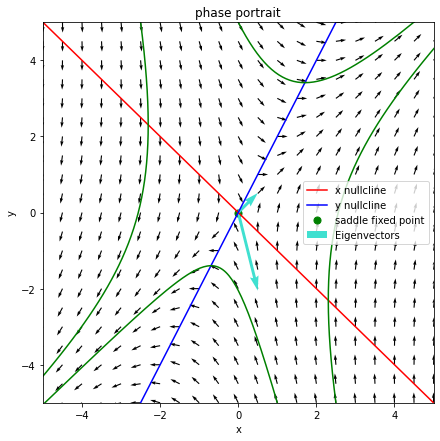

In [5]:
plt.figure(figsize=(7,7)) # create an empty figure

# Fixed points
plt.scatter(x = [0], y = [0], c = 'green', s = 50, label = 'saddle fixed point')


# Define the nullclines
x1 = np.arange(-5,5,0.01)
y1 = -x1
x2 = np.arange(-5,5,0.01)
y2 = 2*x2
plt.plot(x1,y1,'r', label='x nullcline')
plt.plot(x2,y2,'b', label='y nullcline')

# Vector field
q = np.arange(-5,5.1,0.5) 
xp, yp = np.meshgrid(q,q)
dx, dy = model([xp,yp]) 
# normalise the arrow length
dx, dy = dx/np.sqrt(dx**2+dy**2), dy/np.sqrt(dx**2+dy**2) 
plt.quiver(xp,yp,dx,dy) # plot the vector field

# Eigenvectors
V = np.array([[1,-4],[1,1]])
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color='turquoise', scale=20, label = 'Eigenvectors')


# Trajectories
sols = []
for X0 in X0s:
    sol = solution(X0, tspan)
    sols.append(sol)
    plt.plot(sol[0,:],sol[1,:],'g') # plot each trajectory

# Adjust the plot 
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('phase portrait')
plt.legend()
plt.show()

# Competitive exclusion in microbial ecology

In this model, two populations of bacteria $N,M$ (e.g., *Escherichia coli* and *Lactobacillus acidophilus*) compete for the same resources in the same environment (for example in the gut).
A general model that describes this interaction takes the form :

$$
\frac{dN}{dt} = N \left( 1 - \alpha N - M /\alpha \right)
$$
$$
\frac{dM}{dt} =  M \left( 1 - N - M \right)
$$
  
with  $\alpha$ $\ge 0$. 


**1. Calculate the isoclines, the fixed points, and an expression of the Jacobien for the system depending on $\alpha$.**



> #### Answer


> The isoclines are:
> $$
    \dot N=0  \Rightarrow
    \begin{cases}
    N=0\\
    1-\alpha N -\frac{M}{\alpha}=0 \longrightarrow N=\frac{1}{\alpha}-\frac{M}{\alpha^2}
    \end{cases}
$$
> and
> $$
    \dot M=0 \Rightarrow
    \begin{cases}
    M=0\\
    1-N-M=0 \longrightarrow M=1-N.
    \end{cases}
$$

> The fixed points are the intersections between the $N$- and $M$- isoclines.
Since the two isoclines are linear functions, there are zero to four isolated fixed points.
In our case,  there are four fixed points if $\alpha \neq 1$. When $\alpha =1$, there are non-isolated fixed points, which we will not discuss further.  

> The fixed points are:

> $$
\left(0,0\right),\left(\frac{1}{\alpha}, 0\right), (0,1), \left(\frac{1}{\alpha+1},\alpha \frac{1}{\alpha+1} \right).
$$
  
  



> The general expression of the Jacobian is:

> $$J=\begin{pmatrix}(1-\alpha N- M/\alpha) -\alpha N & -N/ \alpha \\-M & (1-N-M)-M\end{pmatrix}$$





**2. Calculate the Jacobian matrix for $\alpha$ = 1/4 and $\alpha$ = 4 at every fixed point. In both cases, discuss the stability of the fixed points** 


> #### Answer
> **$\alpha$ = 1/4**

> $$J=\begin{pmatrix}(1-1/4 N- 4M) -1/4 N & -4N \\-M & (1-N-M)-M\end{pmatrix}$$

> 4 fixed points:
> - (0,0)
> $$J=\begin{pmatrix}1 &0 \\0 & 1\end{pmatrix}$$

> The trace = $Tr(J) = \tau = 2$. The determinant $= det(J) = \Delta = 1$. The discriminant $= \tau^2 - 4\Delta = 0$.
The fixed point is an unstable (star) fixed point. 


> - (4,0)
> $$J=\begin{pmatrix}-1 &-16 \\0 & -3\end{pmatrix}$$

> The trace = $Tr(J) = \tau = -4$. The determinant $= det(J) = \Delta = 3$. The discriminant $= \tau^2 - 4\Delta > 0$.
The fixed point is a stable fixed point.


> - (0,1)
> $$J=\begin{pmatrix}-3 & 0\\-1 & -1\end{pmatrix}$$

> The trace = $Tr(J) = \tau = -4$. The determinant $= det(J) = \Delta = 3$. The discriminant $= \tau^2 - 4\Delta > 0$.
The fixed point is a stable fixed point.



> - (4/5, 1/5)
> $$J=\begin{pmatrix}-1/5 & -16/5\\-1/5 & -1/5\end{pmatrix}$$

>The trace = $Tr(J) = \tau = -2/5$. The determinant $= det(J) = \Delta = -3/5$. The fixed point is a saddle point.





> **$\alpha$ = 4**
> $$J=\begin{pmatrix}(1-4N- M/4) -4N & -N/4 \\-M & (1-N-M)-M\end{pmatrix}$$

> 4 fixed points:
> - (0,0)
> $$J=\begin{pmatrix}1 &0 \\0 & 1\end{pmatrix}$$

> The trace = $Tr(J) = \tau = 2$. The determinant $= det(J) = \Delta = 1$. The discriminant $= \tau^2 - 4\Delta = 0$.
The fixed point is an unstable (star) fixed point. 


> - (1/4,0)
> $$J=\begin{pmatrix}-1 &-1/16 \\0 & 3/4\end{pmatrix}$$

> The trace = $Tr(J) = \tau = -1/4$. The determinant $= det(J) = \Delta = -3/4$. The fixed point is a saddle point.


> - (0,1)
> $$J=\begin{pmatrix}3/4 & 0\\-1 & -1\end{pmatrix}$$

> The trace = $Tr(J) = \tau = -1/4$. The determinant $= det(J) = \Delta = -3/4$. The fixed point is a saddle point.



> - (1/5, 4/5)
> $$J=\begin{pmatrix}-4/5 & -1/20\\-4/5 & -4/5\end{pmatrix}$$

> The trace = $Tr(J) = \tau = -8/5$. The determinant $= det(J) = \Delta = 3/5$. The discriminant $= \tau^2 - 4\Delta > 0$.
> The fixed point is a stable fixed point.

**3.  Plot the phase portraits  for the two cases $\alpha=1/4$ and $\alpha=4$.**

Plot using Python: 

- the isoclines

- the fixed points

- the vector field

- Some representative trajectories for the initial conditions listed in  the array below ($X_0s$)

> Hint: Since here you don't have the exact solution,you can use the odeint function of scipy. Look at previous corrections to understand how this works

Plot the phase portait for x and y in the interval: [-0.5, 5]. For trajectories, use the tspan defined below.

In [14]:
# Declare the initial conditions
X0s = [(5,1), (5,4), (1,5)] 

#time domain
tspan = np.linspace(0, 10, 1000)

> #### Answer


> **$\alpha$ = 1/4**

In [15]:
def model2(s,t, alpha): # define the system of differential equations
    N, M=s
    N_dot=N*(1-alpha*N-M/alpha)
    M_dot=M*(1-M-N)
    return N_dot, M_dot

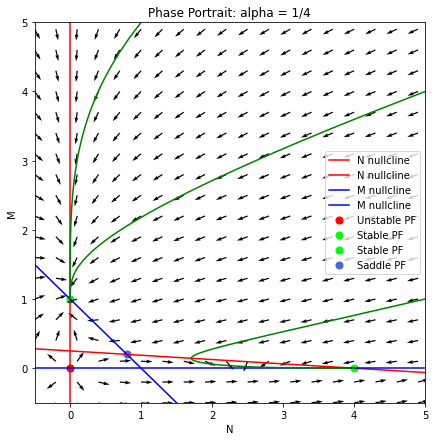

In [16]:
# Case alpha = 1/4

plt.figure(figsize=(7,7)) # create an empty figure

alpha=1/4

# Fixed points
PFs = np.array([[0,0],[4,0],[0,1],[4/5, 1/5]])
stability = ['Unstable PF', 'Stable PF', 'Stable PF', 'Saddle PF']
cs = ['red', 'lime', 'lime', 'royalblue']

for i in range(len(PFs)):
    PF = PFs[i]
    plt.scatter(PF[0], PF[1], s = 50, c= cs[i], label= stability[i])
    
# define the nullclines
N1=np.arange(-5,5,0.01)
M1=alpha-N1*alpha**2
N2=np.arange(-5,5,0.01)
M2=1-N2
plt.plot(N1,M1,'r', label='N nullcline')
plt.axvline(x=0.0, color = 'r', label = "N nullcline") # N nullcine is a vertical line
plt.plot(N2,M2,'b', label='M nullcline')
plt.plot(N1, np.zeros(len(N1)),'b', label = 'M nullcline') # M nullcline is a horizontal line (alternative to axhline)


# compute the vector field
q=np.arange(-0.5,5.1,0.3)
Np, Mp=np.meshgrid(q,q)
dN, dM=model2([Np,Mp],tspan, alpha)
dN, dM = dN/np.sqrt(dN**2+dM**2), dM/np.sqrt(dN**2+dM**2) 
plt.quiver(Np,Mp,dN,dM) # plot the vector field

# Compute and plot the trajectories

for X0 in X0s: # different initial conditions 
    sol = odeint(model2, X0, tspan, args=(alpha,)) # solve the differential equation using an ODE solver "odeint" 
    plt.plot(sol[:,0],sol[:,1],'g') # plot the trajectories
    
# Adjust plot
plt.xlim(-0.5,5)
plt.ylim(-0.5,5)
plt.xlabel('N')
plt.ylabel('M')
plt.title('Phase Portrait: alpha = 1/4')
plt.legend()
plt.show()



**$\alpha$ = 4**



In [17]:
def model2(s,t, alpha): # define the system of differential equations
    N, M=s
    N_dot=N*(1-alpha*N-M/alpha)
    M_dot=M*(1-M-N)
    return N_dot, M_dot

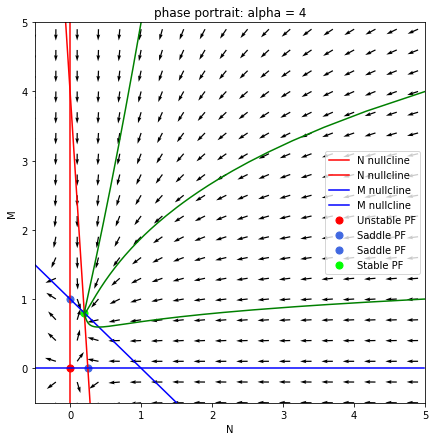

In [18]:
# Case alpha = 1/4

plt.figure(figsize=(7,7)) # create an empty figure

alpha=4
# Fixed points
PFs = np.array([[0,0],[1/4,0],[0,1],[1/5, 4/5]])
stability = ['Unstable PF', 'Saddle PF', 'Saddle PF', 'Stable PF']
cs = ['red', 'royalblue' , 'royalblue','lime']

for i in range(len(PFs)):
    PF = PFs[i]
    plt.scatter(PF[0], PF[1], s = 50, c= cs[i], label= stability[i])
    
# define the nullclines
N1=np.arange(-5,5,0.01)
M1=alpha-N1*alpha**2
N2=np.arange(-5,5,0.01)
M2=1-N2
plt.plot(N1,M1,'r', label='N nullcline')
plt.axvline(x=0.0, color = 'r', label = "N nullcline") # N nullcine is a vertical line
plt.plot(N2,M2,'b', label='M nullcline')
plt.plot(N1, np.zeros(len(N1)),'b', label = 'M nullcline') # M nullcline is a horizontal line (alternative to axhline)


# compute the vector field
q=np.arange(-0.5,5.1,0.3)
Np, Mp=np.meshgrid(q,q)
dN, dM=model2([Np,Mp],tspan, alpha)
dN, dM = dN/np.sqrt(dN**2+dM**2), dM/np.sqrt(dN**2+dM**2) 
plt.quiver(Np,Mp,dN,dM) # plot the vector field

# Compute and plot the trajectories
for X0 in X0s: # different initial conditions 
    sol = odeint(model2, X0, tspan, args=(alpha,)) # solve the differential equation using an ODE solver "odeint" 
    plt.plot(sol[:,0],sol[:,1],'g') # plot the trajectories

# Adjust the plot
plt.xlim(-0.5,5) 
plt.ylim(-0.5,5)
plt.xlabel('N')
plt.ylabel('M')
plt.title('phase portrait: alpha = 4')
plt.legend()
plt.show()